**1. Data Preprocessing.**

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [24]:
df = pd.read_csv('/Users/imac/Desktop/pizza_db_files/pizza_sales.csv')

df['order_date'] = df['order_date'].str.replace('-', '.')
df['order_date'] = df['order_date'].str.replace('/', '.')
df.to_excel('pizza_sales_df.xlsx', index=True)
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1.1.2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1.1.2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1.1.2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1.1.2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1.1.2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [25]:
print(df.info())

print('Null Values: ', df.isnull().sum())

print('Duplicates: ', df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB
None
Null Values:  pizza_id             0
order_id             0
pizza_name_id        0
quantity             0
order_date           0
order_time           0
unit_price

In [26]:
print('Dataset for period:', 'from', min(df['order_date']), 'to', max(df['order_date']))

Dataset for period: from 1.1.2015 to 9.9.2015


**1.1. Group by order_date. Add 'weekday' column. Explore correlation.**

,order_date,quantity,total_price,weekday
0,2015-01-01,162.0,2713.85,3
1,2015-01-02,191.0,3189.20,4
2,2015-01-03,99.0,1598.55,5
3,2015-01-04,135.0,2176.85,6
4,2015-01-05,154.0,2571.95,0


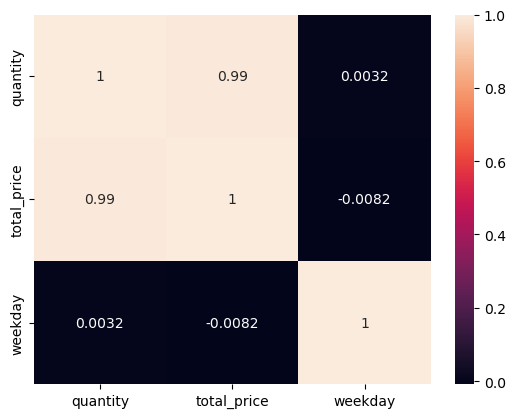

In [27]:
# grouping sales data daily and adding 'weekday' column
df['order_date'] = pd.to_datetime(df['order_date'])

daily_summary = df.groupby('order_date').agg({'quantity' : sum, 'total_price' : sum}).reset_index()
daily_summary['weekday'] = daily_summary['order_date'].dt.dayofweek
# 0: Monday 1: Tuesday 2: Wednesday 3: Thursday 4: Friday 5: Saturday 6: Sunday

sns.heatmap(daily_summary.corr(), annot=True)
daily_summary.head()

Correlation map shows trivial dependancies,

we assume there might be a dependancy between

weekday and total pizzas sold, month and total pizzas sold

hour of the day and total pizzas sold

despite the weak correlation.

**2. Exploratory data analysis. 'Quantity' distribution.**



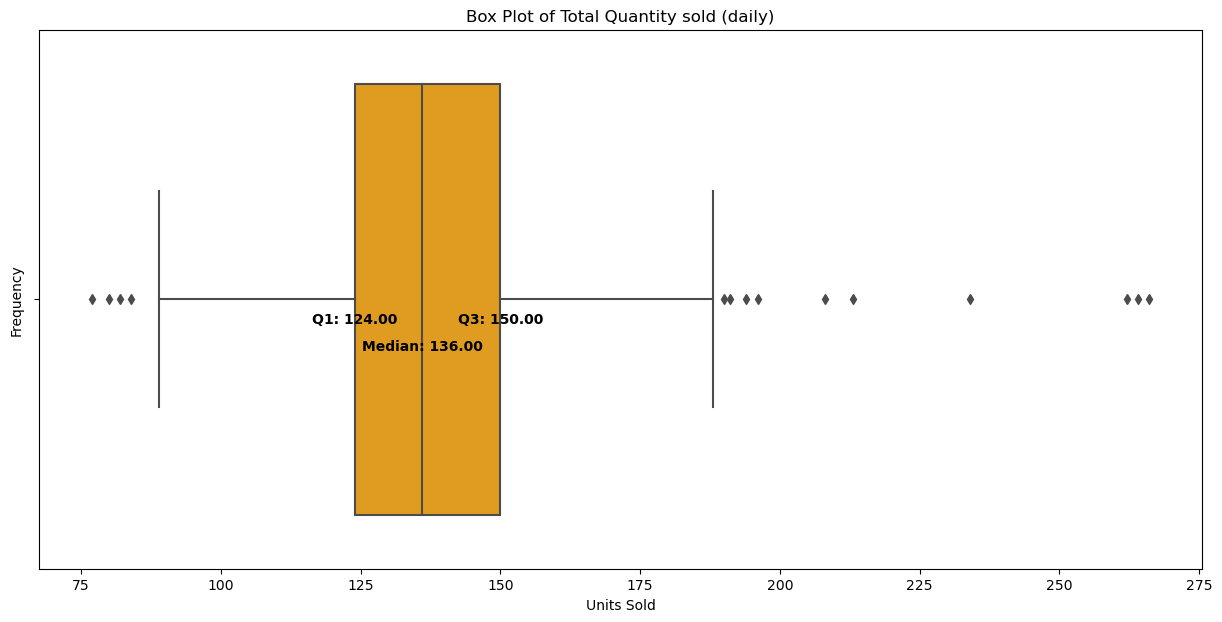

In [28]:
# boxplot of 'quantity' distribution (daily)
plt.figure(figsize=(15,7))
ax = sns.boxplot(x=daily_summary['quantity'], color='orange')

# calculate the quartiles
Q1 = daily_summary['quantity'].quantile(0.25)
median = daily_summary['quantity'].median()
Q3 = daily_summary['quantity'].quantile(0.75)
IQR = Q3 - Q1 

plt.xlabel('Units Sold')
plt.ylabel('Frequency')
plt.title('Box Plot of Total Quantity sold (daily)')

# text annotations
ax.text(x=Q1, y=0.05, s=f"Q1: {Q1:.2f}", verticalalignment='bottom', horizontalalignment='center', color='black', weight='semibold')
ax.text(x=median, y=0.10, s=f"Median: {median:.2f}", verticalalignment='bottom', horizontalalignment='center', color='black', weight='semibold')
ax.text(x=Q3, y=0.05, s=f"Q3: {Q3:.2f}", verticalalignment='bottom', horizontalalignment='center', color='black', weight='semibold')
plt.show()

**2.1. Find 'order_date' of outliers.**

In [30]:
# find 'order_date' of outlying quantity of pizzas sold
outliers = daily_summary[(daily_summary.quantity < Q1 - 1.5 * IQR) | (daily_summary.quantity > Q3 + 1.5 * IQR)]
outlier_dates = outliers[['order_date','weekday','quantity']]

outlier_dates = outlier_dates.sort_values(by='quantity')
len(outlier_dates) # 14 outliers
outlier_dates
#outlier_dates.to_csv('outlier_dates.csv', index=False)

,order_date,weekday,quantity
80,2015-03-22,6,77.0
355,2015-12-29,1,80.0
356,2015-12-30,2,82.0
320,2015-11-22,6,84.0
160,2015-06-11,3,190.0
1,2015-01-02,4,191.0
9,2015-01-10,5,194.0
203,2015-07-24,4,196.0
133,2015-05-15,4,208.0
65,2015-03-07,5,213.0


**2.3. 'Quantity' and 'Total_price' analysis by weekday.**

In [13]:
# group 'total_price' and 'quantity' sold by weekday
weekday_sales = daily_summary.groupby('weekday').agg({'quantity' : sum, 'total_price': sum}).reset_index()
weekday_sales
# 0: Monday 1: Tuesday 2: Wednesday 3: Thursday 4: Friday 5: Saturday 6: Sunday

,weekday,quantity,total_price
0,0,6684.0,110471.60
1,1,6981.0,115594.45
2,2,7058.0,116731.20
3,3,7387.0,121650.30
4,4,7859.0,129690.90
5,5,7408.0,121605.15
6,6,6197.0,102116.45


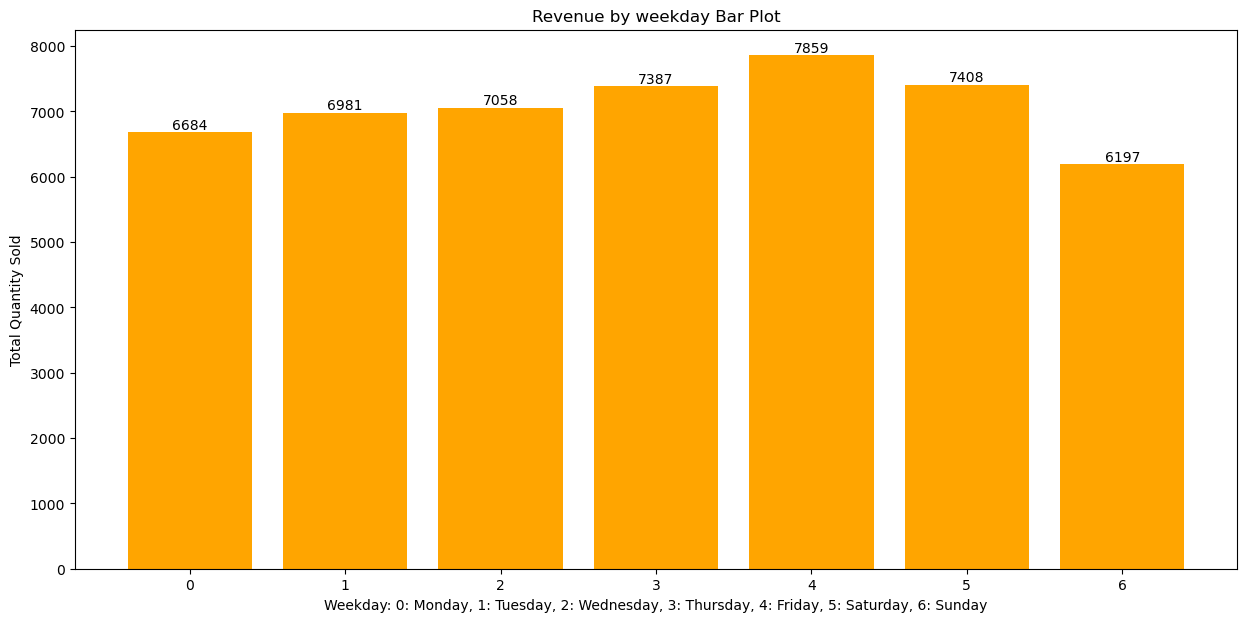

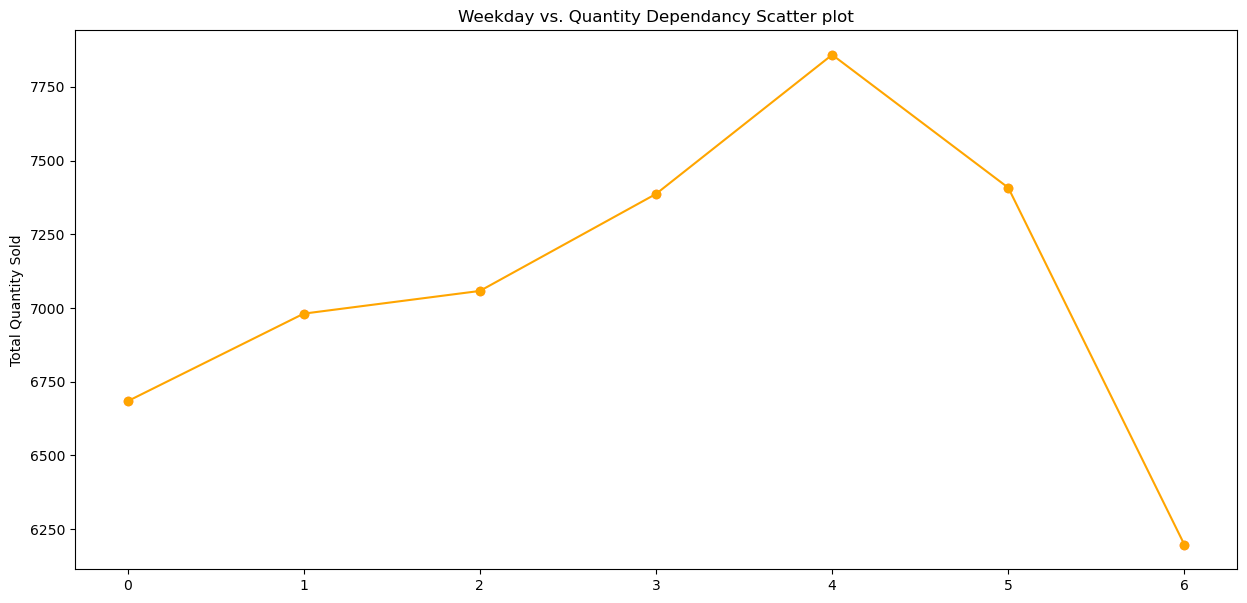

In [14]:
# barplot of 'quantity' sold on 'weekday'
plt.figure(figsize=(15,7))
plt.bar(weekday_sales['weekday'], weekday_sales['quantity'], color='orange')

for index, value in enumerate(weekday_sales['quantity']):
    plt.text(index, value, str(round(value)), ha='center', va='bottom')

plt.title('Revenue by weekday Bar Plot')
plt.xlabel('Weekday: 0: Monday, 1: Tuesday, 2: Wednesday, 3: Thursday, 4: Friday, 5: Saturday, 6: Sunday')
plt.ylabel('Total Quantity Sold')
plt.show()

# scatter plot of 'weekday' vs 'quantity'
plt.figure(figsize=(15,7))
x = weekday_sales['weekday']
y = weekday_sales['quantity']
plt.scatter(x,y, color='red', alpha=0.4)
plt.plot(x, y, color='orange', linestyle='-', marker='o')
plt.title('Weekday vs. Quantity Dependancy Scatter plot')
plt.ylabel('Total Quantity Sold')
plt.show()

**2.4. 'Quantity' analysis by month.**

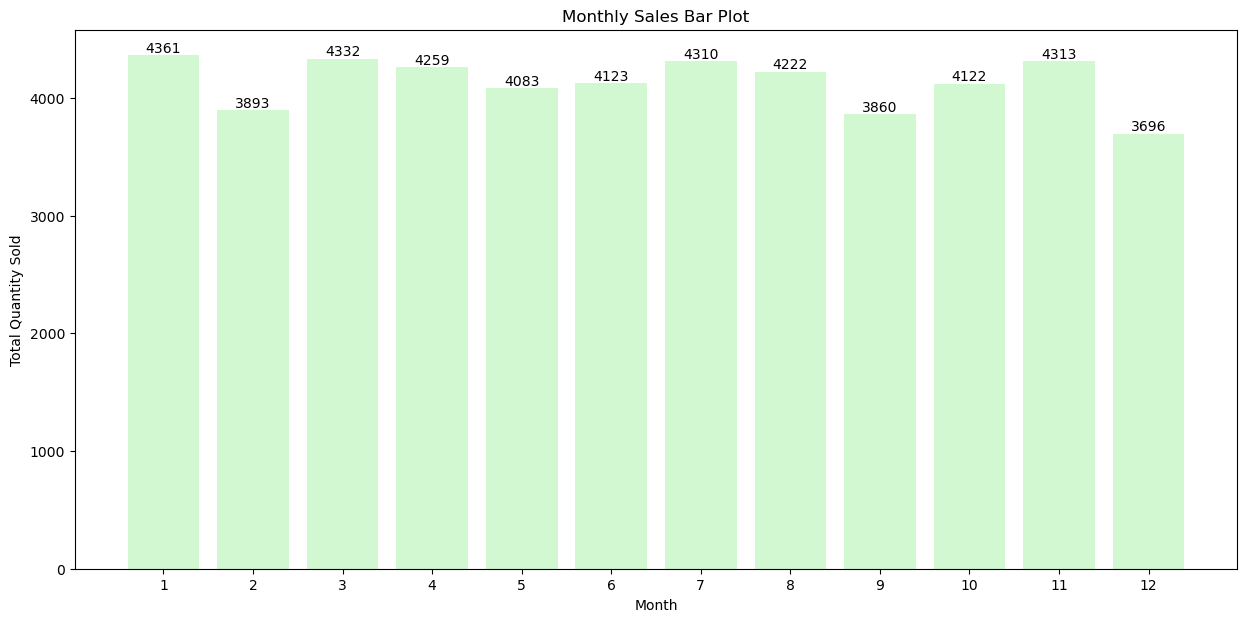

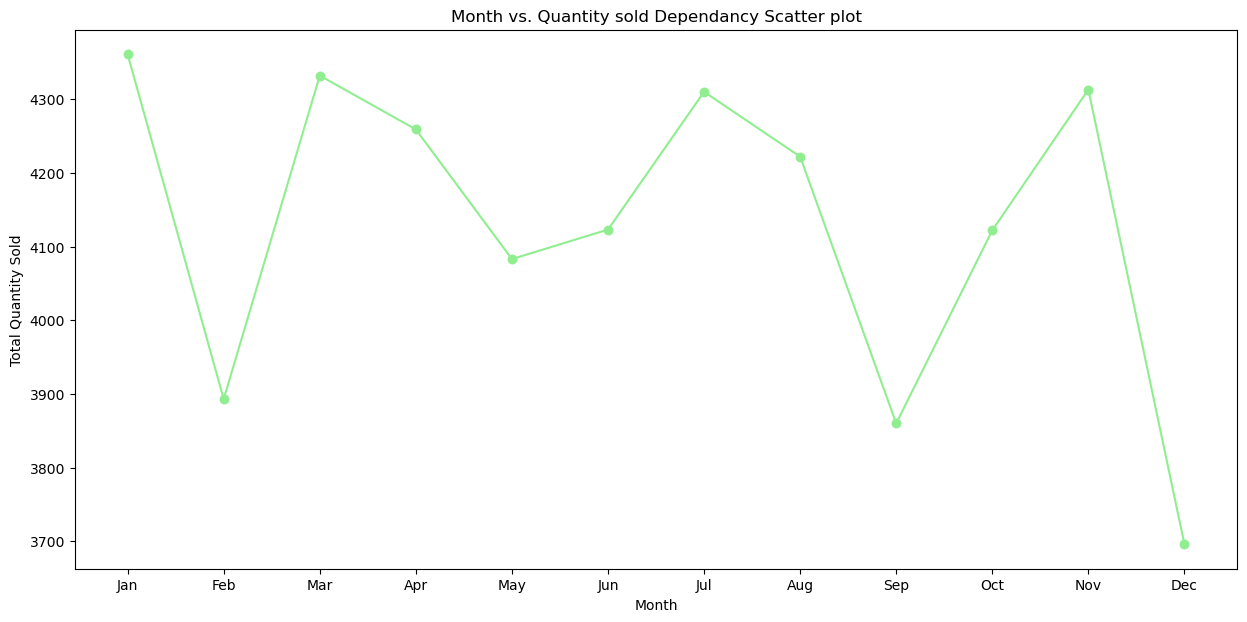

In [15]:
monthly_sales = df.groupby(pd.Grouper(key='order_date', freq='M')).agg({'quantity':sum, 'total_price':sum}).reset_index()
monthly_sales.reset_index(drop=True, inplace=True)
monthly_sales.index += 1

plt.figure(figsize=(15,7))
x = monthly_sales.index
y = monthly_sales['quantity']
plt.bar(x, y, color='lightgreen', alpha=0.4)
plt.title('Monthly Sales Bar Plot')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(x)

for index, value in enumerate(monthly_sales['quantity']):
    plt.text(index+1, value, str(round(value)), ha='center', va='bottom')

# scatter plot of mothly sales
plt.figure(figsize=(15,7))
x = monthly_sales.index
y = monthly_sales['quantity']
plt.scatter(x, y, color='lightgreen', alpha=0.4)

plt.plot(x, y, color='lightgreen', linestyle='-', marker='o')
plt.title('Month vs. Quantity sold Dependancy Scatter plot')
plt.xlabel('Month')
x_ticks_pos = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
x_ticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(x_ticks_pos, x_ticks_labels)
plt.ylabel('Total Quantity Sold')
plt.show()

**2.5. 'Total_price' distribution.**

In [16]:
# 'total_price' (daily revenue)
daily_summary['total_price'].describe()

count     358.000000
mean     2284.525279
std       405.946845
min      1259.250000
25%      2047.875000
50%      2246.000000
75%      2463.937500
max      4422.450000
Name: total_price, dtype: float64

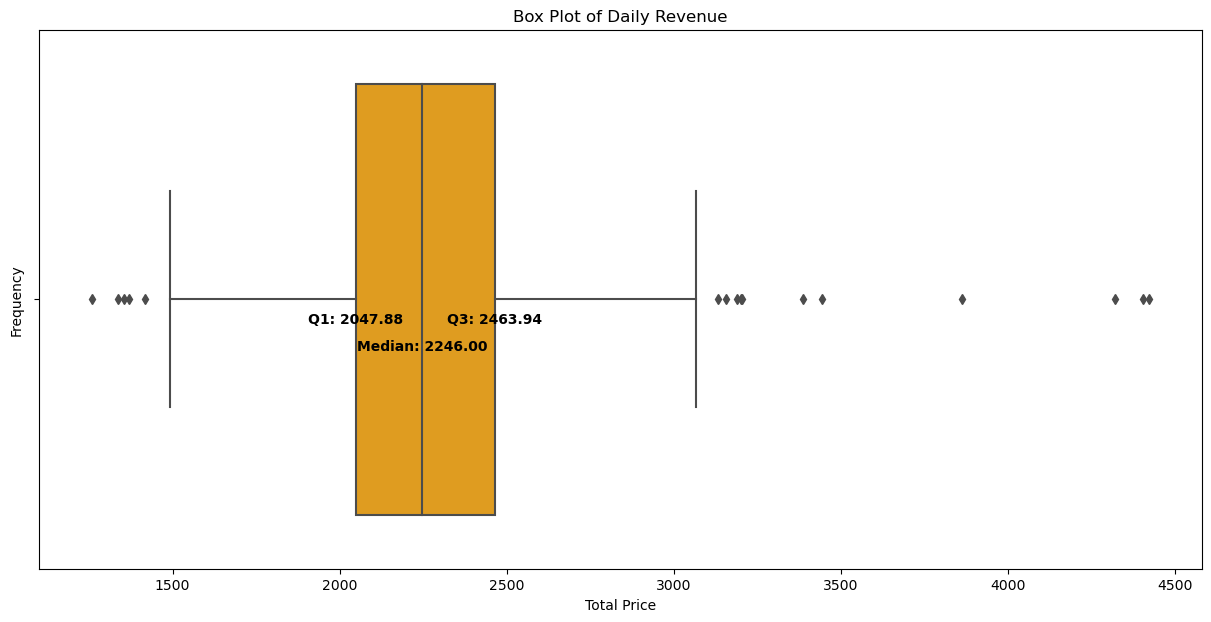

In [17]:
# 'total_price' boxplot (distribution of 'total_price' daily)
plt.figure(figsize=(15,7))
ax = sns.boxplot(x=daily_summary['total_price'],color='orange')

# calculate the quartiles
Q1 = daily_summary['total_price'].quantile(0.25)
median = daily_summary['total_price'].median()
Q3 = daily_summary['total_price'].quantile(0.75)
IQR = Q3 - Q1

plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.title('Box Plot of Daily Revenue')

# text annotations
ax.text(x=Q1, y=0.05, s=f"Q1: {Q1:.2f}", verticalalignment='bottom', horizontalalignment='center', color='black', weight='semibold')
ax.text(x=median, y=0.10, s=f"Median: {median:.2f}", verticalalignment='bottom', horizontalalignment='center', color='black', weight='semibold')
ax.text(x=Q3, y=0.05, s=f"Q3: {Q3:.2f}", verticalalignment='bottom', horizontalalignment='center', color='black', weight='semibold')
plt.show()

**2.6. Find 'order_date' of outliers in 'total_price'.**

In [18]:
# outliers in total_price (daily)
outliers_price = daily_summary[(daily_summary.total_price < Q1 - 1.5 * IQR) | (daily_summary.total_price > Q3 + 1.5 * IQR)]
outliers_dates = outliers_price[['order_date','quantity','total_price']]

len(outliers_dates) # 16 outliers
outliers_dates = outliers_dates.sort_values(by='total_price', ascending=False)
outliers_dates

,order_date,quantity,total_price
325,2015-11-27,264.0,4422.45
324,2015-11-26,266.0,4405.95
284,2015-10-15,262.0,4320.20
96,2015-04-07,234.0,3864.20
65,2015-03-07,213.0,3443.00
133,2015-05-15,208.0,3386.15
203,2015-07-24,196.0,3204.40
9,2015-01-10,194.0,3202.15
1,2015-01-02,191.0,3189.20
160,2015-06-11,190.0,3157.50


**2.7. Detect peak hours of work.**

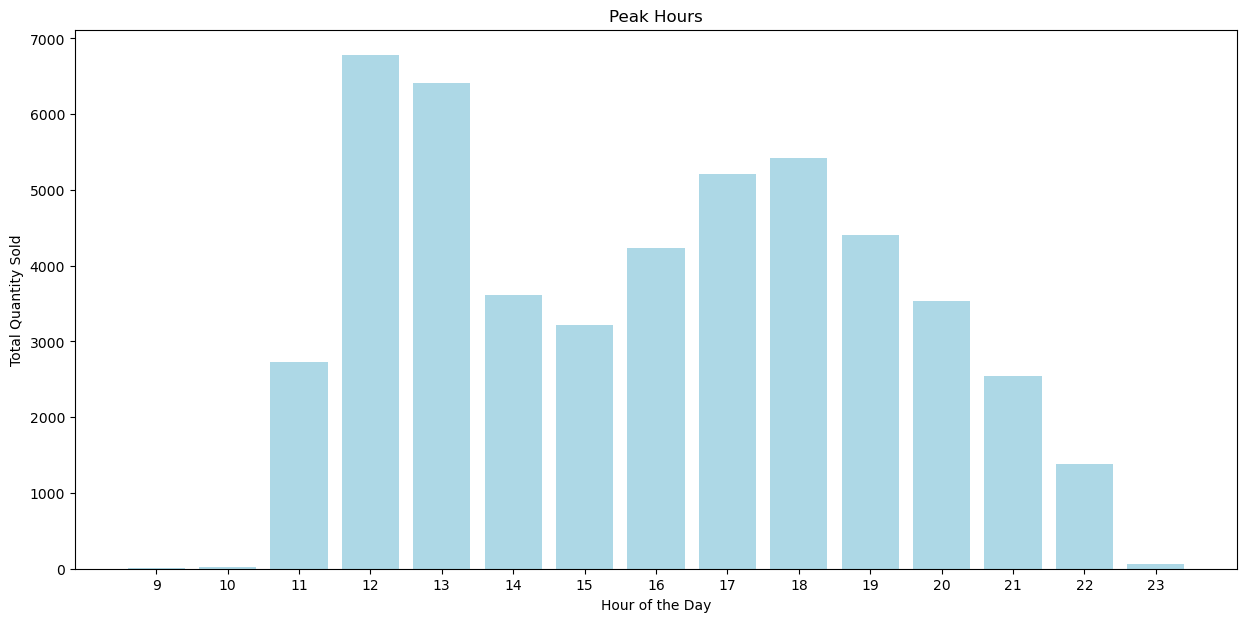

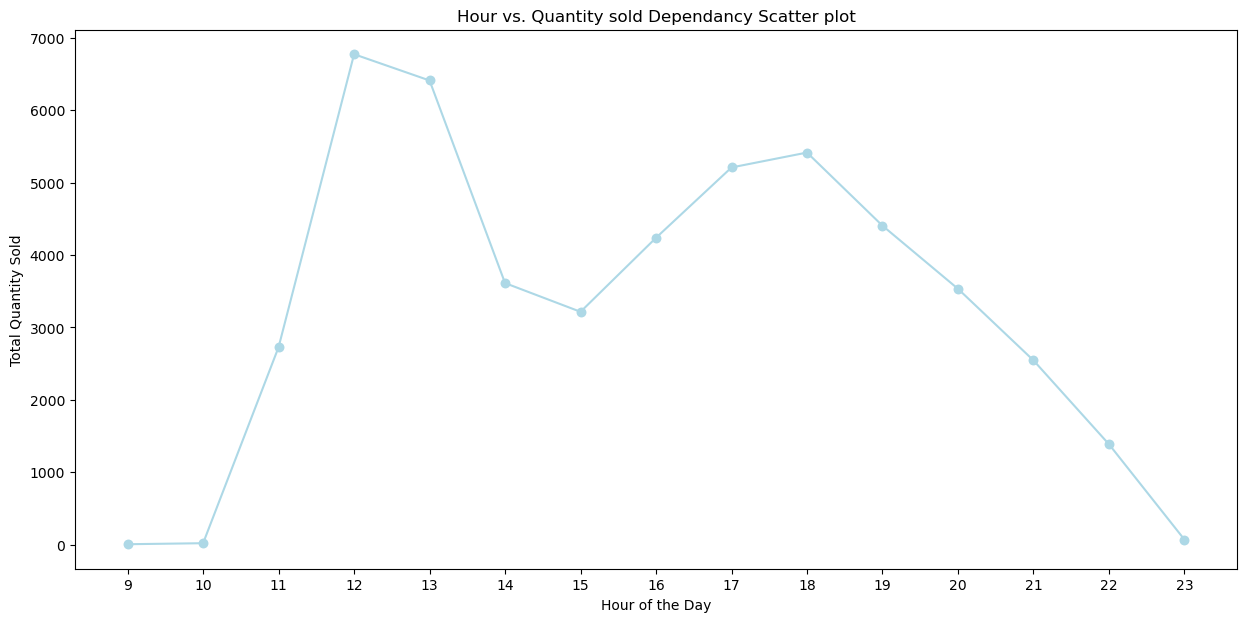

In [19]:
# busy hours bar plot
df['order_hour'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.hour
# group by the hour component and calculate aggregate statistics
hourly_sales = df.groupby('order_hour').agg({'quantity': 'sum', 'total_price': 'sum'}).reset_index()

plt.figure(figsize=(15, 7))
plt.bar(hourly_sales['order_hour'], hourly_sales['quantity'], color='lightblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Quantity Sold')
plt.title('Peak Hours')
plt.xticks(range(9,24))
plt.show()

# scatter plot of peak hours
plt.figure(figsize=(15,7))
x = hourly_sales['order_hour']
y = hourly_sales['quantity']
plt.scatter(x, y, color='lightblue', alpha=0.4)

plt.plot(x, y, color='lightblue', linestyle='-', marker='o')
plt.title('Hour vs. Quantity sold Dependancy Scatter plot')
plt.xlabel('Hour of the Day')
plt.xticks(range(9,24))
plt.ylabel('Total Quantity Sold')
plt.show()

**2.8. Total Revenue. Top pizza_category, top 3 and bottom 3 'pizza_name' sold. Max quantity of pizzas in 1 order.**

In [20]:
# total revenue $817,860
print('Total Revenue:', df.total_price.sum())
df.quantity.sum() # 49,574 pizzas sold

# top category
best_category = df.groupby('pizza_category').agg({'quantity' : sum}).reset_index()
best_category = best_category.sort_values(by='quantity', ascending=False) # Classic 14,888 pizzas sold
print('Top category:' + str(best_category[0:1]))


# top 3 and bottom 3 'pizza_name' sold
pizza_name_sales = df.groupby('pizza_name').agg({'quantity' : sum}).reset_index()
pizza_name_sales = pizza_name_sales.sort_values(by='quantity', ascending=False)
print('Top 3:'+ str(pizza_name_sales[0:3]))
print('Bottom 3:' + str(pizza_name_sales[-3:]))

# max amount of pizzas in 1 order
max_order = df.groupby('order_id').agg({'quantity' : sum}).reset_index()
max_order['quantity'].describe() # 28 pizzas in 1 order

Total Revenue: 817860.05
Top category:  pizza_category  quantity
1        Classic   14888.0
Top 3:                    pizza_name  quantity
7     The Classic Deluxe Pizza    2453.0
0   The Barbecue Chicken Pizza    2432.0
12          The Hawaiian Pizza    2422.0
Bottom 3:                 pizza_name  quantity
3       The Calabrese Pizza     937.0
16  The Mediterranean Pizza     934.0
2      The Brie Carre Pizza     490.0


count    21350.000000
mean         2.321967
std          1.825735
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         28.000000
Name: quantity, dtype: float64